<a href="https://colab.research.google.com/github/Chandu0444/Machine_learning/blob/main/Time_series_MC(06_1102025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series handson with air passengers dataset

In [ ]:
#Dataset -> Date -> in a proper order
#forcaste - TimeSeries
#ARIMA,SARIMA,SARIMAX
#take only one column as input , x
#1.convertion of date to index
#2.Sationarity test -> ADF
#3.if not Sationarized -> diffrencing( mean)
#4.we will find optimal p,d,q values
#5.Model(p,q,d)
#6.forcasting

In [ ]:
# Dataset:- https://drive.google.com/file/d/17IRpG04lLz4aot6MYHIgGjzfy3yft4ms/view?usp=drive_link

In [ ]:
# do forcasting for the nexr 12 months

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/AirPassengers.csv")

In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


# 144rows-> 144 months -> 12 years

In [ ]:
data['Month']=pd.to_datetime(data['Month'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
data.index=data['Month']

In [ ]:
data.drop('Month',axis=1,inplace=True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Find data is stationary or not

<Axes: xlabel='Month'>

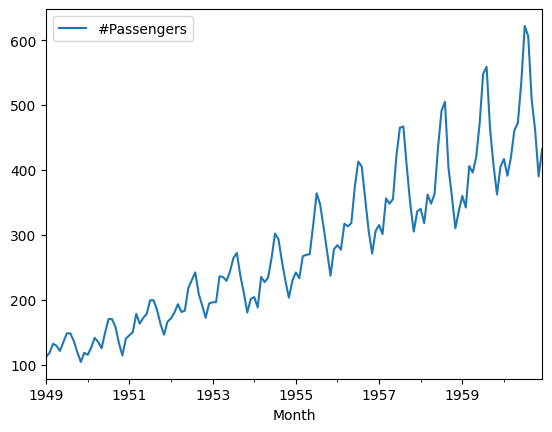

In [ ]:
data.plot()

We can clearly say that data is not stationary by seeing the graphn

The lines hould be linear for the stationary data

ADFuller test:- used to check our series is stationarized or not

null hypo:- data is stationary

alter hpyo :- not stationary

p_val

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result=adfuller(data['#Passengers'])
p_val1 = result[1]

If p valaue is less than 0.05 we accept null htpo else we reject null hypo and accept alter hypo

Here data is not stationarized

To stationarize the data we do differencing.by finding moving (rolling difference)

In [ ]:
rolling_mean=data.rolling(window=12).mean() #time:- 55:00
data_new=data-rolling_mean
data_new #the starting 12 values are null value cause window value is 12

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


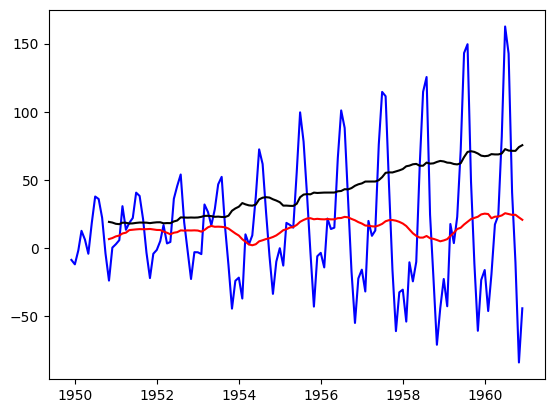

In [ ]:
#plotting data
m=data_new.rolling(window=12).mean()
s=data_new.rolling(window=12).std()
plt.plot(data_new,color='blue')
plt.plot(m,color='red')
plt.plot(s,color='black')
plt.show()

In [ ]:
data_new.dropna(inplace=True)

In [ ]:
result=adfuller(data_new['#Passengers'])
p_val2 = result[1]
p_val2

0.022104139473878875

here we accept p val2 cause it is p < 0.05

In [ ]:
data_new.shape # we will have 11 years data cause 12 month are erased for standarization

(133, 1)

In [ ]:
#133 months > 11 years
#10 years > training
#1 year > testing

In [ ]:
train=data_new[0:120]['#Passengers']
test=data_new[120:]['#Passengers']

In [ ]:
train.shape

(120,)

In [ ]:
test.shape

(13,)

#Model building

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(train,order=(1,1,3))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
data_new['Predict']=model_fit.predict(start=len(train),end =len(train)+len(test)-1)

<Axes: xlabel='Month'>

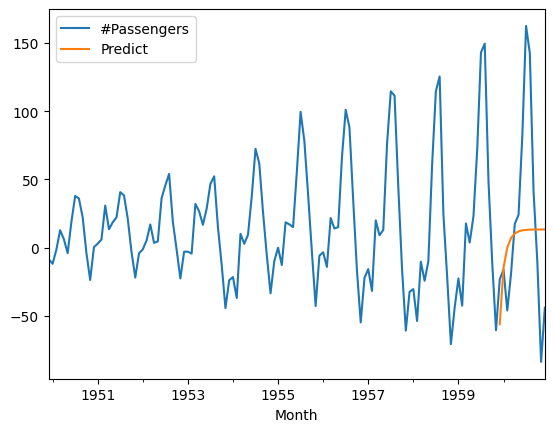

In [ ]:
data_new[['#Passengers','Predict']].plot()

#Auto ARIMA

In [ ]:
#!pip install numpy==1.26.4
# run thi code and then restart the sesison and comment this line and run all the cells

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
auto=auto_arima(data_new['#Passengers'])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

In [ ]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -612.905
Date:                Mon, 10 Nov 2025   AIC                           1239.810
Time:                        13:07:26   BIC                           1260.043
Sample:                    12-01-1949   HQIC                          1248.032
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.8579      1.701      4.033      0.000       3.525      10.191
ar.L1          0.8625      0.171      5.045      0.000       0.527       1.198
ar.L2          0.2071      0.236      0.878      0.380      -0.255       0.670
ar.L3         -0.5239      0.142     -3.683      0.000      -0.803      -0.245
ma.L1          0.0684      0.138      0.496      0.620      -0.202       0.338
ma.L2         -0.7564      0.091     -8.293      0.000      -0.935      -0.578
sigma2       577.4776     71.847      8.038      0.000     436.660     718.295
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 8.11
Prob(Q):                              0.89   Prob(JB):                         0.02
Heteroskedasticity (H):               6.21   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# according to auto arima :-

model = sarimax(3,0,2)

pdq=(3,0,2)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In sarimax we should defenetely give seasonal order, seasonal means a period of time that repeats.

In [ ]:
model=SARIMAX(train,order=(3,0,2),seasonal_order=(3,0,2,12))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
sarimax_fit=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
data_new['Predict']=sarimax_fit.predict(start=len(train),end =len(train)+len(test)-1)

<Axes: xlabel='Month'>

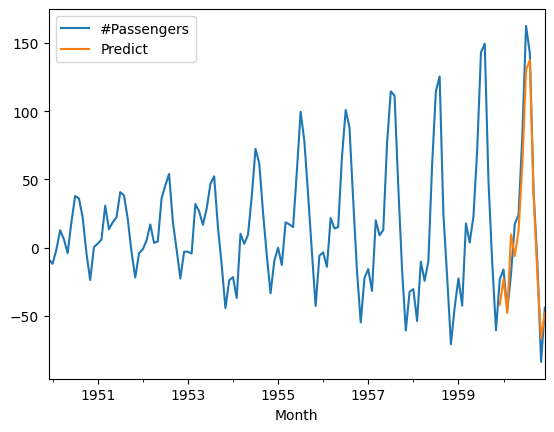

In [ ]:
data_new[['#Passengers','Predict']].plot()

In [ ]:
data_new

,#Passengers,Predict
Month,,
1949-12-01,-8.666667,NaN
1950-01-01,-11.916667,NaN
1950-02-01,-1.583333,NaN
1950-03-01,12.666667,NaN
1950-04-01,6.166667,NaN
...,...,...
1960-08-01,142.666667,137.468830
1960-09-01,40.916667,38.187274
1960-10-01,-10.583333,-19.496246


In [ ]:
forcasted = sarima_fit.forecast(steps=12 + 12) # steps = len(test) + required no.of feture rows
#test size: 120 to 133 means it will take upto 132 so we take 12 and we need predictions for 1 year means 12 months.
# steps= 12+12

<Axes: xlabel='Month'>

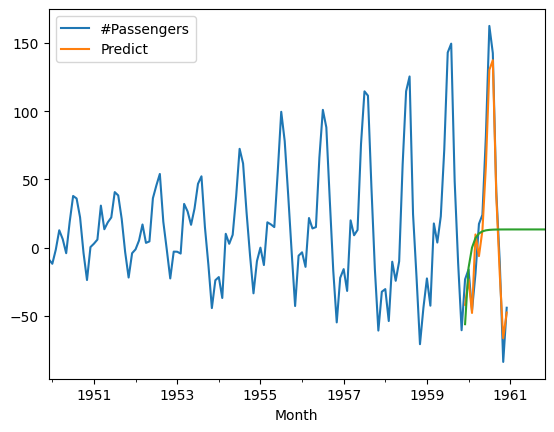

In [ ]:
data_new.plot()
forcasted.plot()